# **Image Classification**

### **Image Classification** is a fundamental task that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to a specific label. Typically, Image Classification refers to images in which only one object appears and is analyzed. In contrast, object detection involves both classification and localization tasks, and is used to analyze more realistic cases in which multiple objects may exist in an image.








## Machine Learning Algorithms

## 1. K-Nearest Neighbors

K-Nearest Neighbors is a classification algorithm that examines the closest training examples and looks at their labels to ascertain the most probable label for a given test example. When it comes to image classification using KNN, the feature vectors and labels of the training images are stored and just the feature vector is passed into the algorithm during testing.


##2. Support Vector Machines

Support Vector Machines are a classification method that places points in space and then draws dividing lines between the points, placing objects in different classes depending on which side of the dividing plane the points fall on. Support Vector Machines are capable of doing nonlinear classification through the use of a technique known as the kernel trick.

##3. Deep Learning Algorithms (CNNs)
<img src = "https://ml8ygptwlcsq.i.optimole.com/fMKjlhs-QzMakt0P/w:740/h:228/q:auto/https://www.unite.ai/wp-content/uploads/2020/09/Typical_cnn.png">

The most commonly used image classification algorithm in recent times is the Convolutional Neural Network (CNNs). CNNs are customized versions of neural networks that combine the multilayer neural networks with specialized layers that are capable of extracting the features most important and relevant to the classification of an object. CNNs can automatically discover, generate, and learn features of images. 

## Introducing Convolutional Neural Networks

## 1. Convolution
A convolution extracts tiles of the input feature map, and applies filters to them to compute new features, producing an output feature map, or convolved feature (which may have a different size and depth than the input feature map). Convolutions are defined by two parameters:

Size of the tiles that are extracted (typically 3x3 or 5x5 pixels).
The depth of the output feature map, which corresponds to the number of filters that are applied.

<img src ="https://developers.google.com/machine-learning/practica/image-classification/images/convolution_overview.gif">

For each filter-tile pair, the CNN performs element-wise multiplication of the filter matrix and the tile matrix, and then sums all the elements of the resulting matrix to get a single value. Each of these resulting values for every filter-tile pair is then output in the convolved feature matrix

<img src = "https://developers.google.com/machine-learning/practica/image-classification/images/convolution_example.svg">

During training, the CNN "learns" the optimal values for the filter matrices that enable it to extract meaningful features (textures, edges, shapes) from the input feature map. As the number of filters (output feature map depth) applied to the input increases, so does the number of features the CNN can extract. 


## 2. Relu

Following each convolution operation, the CNN applies a Rectified Linear Unit (ReLU) transformation to the convolved feature, in order to introduce nonlinearity into the model. The ReLU function,F(x) = max(0,x) , returns x for all values of x > 0, and returns 0 for all values of x ≤ 0.
<img src = "">


## 3. Max Pooling

After ReLU comes a pooling step, in which the CNN downsamples the convolved feature (to save on processing time), reducing the number of dimensions of the feature map, while still preserving the most critical feature information. A common algorithm used for this process is called max pooling.

Max pooling operations take two parameters:

- Size of the max-pooling filter (typically 2x2 pixels)
- Stride: the distance, in pixels, separating each extracted tile. Unlike with convolution, where filters slide over the feature map pixel by pixel, in max pooling, the stride determines the locations where each tile is extracted.



<img src="https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif">


## 4. Fully Connected Layers
At the end of a convolutional neural network are one or more fully connected layers (when two layers are "fully connected," every node in the first layer is connected to every node in the second layer). Their job is to perform classification based on the features extracted by the convolutions. 

<img src ="https://developers.google.com/machine-learning/practica/image-classification/images/cnn_architecture.svg">

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 30 02:12:29 2019

@author: Mithilesh
"""

""" 1- Imported cv2 to read the image and also to convert the image from BGR to RGB.
    2- Numpy is imported in order to do mathematical stuffs.
    3- Matplotlib.pyplot is imported to draw the image .
    4- KMeans is imported to perform KMeans-Clusterring. """
    
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


class Segmentation:
    
    def __init__(self,image,dom_colors):
        #since cv2 reads image in BGR mode , it is necessary to convert into RGB mode.
        self.image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        self.orginal_size=image.shape
        #flatenning the image in order to make it compatible for KMeans class
        self.pixel_array=self.image.reshape((-1,3))
        self.dom_colors=dom_colors
        #Created an instance of KMeans 
        self.km=KMeans(n_clusters=self.dom_colors)
        #created a model here
        self.km.fit(self.pixel_array)
           
    #this program helps to extract out the dominant colors from the image    
    def dominant_colors(self):
        #taking out the centers
        self.centers=np.array(self.km.cluster_centers_,dtype='uint8')
        self.colors=[]
        plt.figure(0,(16,2))
        var=1
        for current_center in self.centers:
            plt.subplot(1,self.dom_colors+1,var)
            plt.gca().set_title("Color "+str(var),fontsize=10)
            plt.axis("off")
            self.colors.append(current_center)
            #created an array to store data of each dominant color
            color_array=np.zeros((100,100,3),dtype='uint8')
            color_array[:,:,:]=current_center
            plt.imshow(color_array)
            var+=1
        plt.show()
        
    #this fucntion draws the image with the given dominant colors
    def draw_image(self):
        self.centers=np.array(self.km.cluster_centers_,dtype='uint8')
        #here predict function gives label to each point , i.e the given point is nearer to which center
        pred=self.km.predict(self.pixel_array)
        #creaed an empty array to store data of image 
        new_image=np.zeros((self.image.shape[0]*self.image.shape[1],3),dtype='uint8')
        for i in range(new_image.shape[0]):
            new_image[i]=self.centers[pred[i]]
        #new_image is reshaped into original size in order to get whole image together
        new_image=new_image.reshape(self.orginal_size)
        plt.axis("off")
        plt.title("No. of colors : "+str(self.dom_colors))
        plt.imshow(new_image)
        plt.show()
        


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


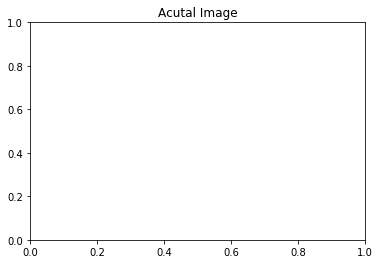

In [ ]:
img=cv2.imread("D:\C\Sherlock.jpg")
plt.title("Acutal Image")
plt.style.use("default")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
for i in range(2,11,4):
    IS=Segmentation(img,i)
    IS.draw_image()
    IS.dominant_colors()
plt.show()